In [8]:
from pcgym import make_env
import numpy as np
import random

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\mfb22\Documents\GitHub\pcgym\.venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code
  File "C:\Users\mfb22\AppData\Local\Temp\ipykernel_432\2255633211.py", line 1, in <module>
    from pcgym import make_env
ImportError: cannot import name 'make_env' from 'pcgym' (C:\Users\mfb22\Documents\GitHub\pcgym\src\pcgym\__init__.py)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\mfb22\Documents\GitHub\pcgym\.venv\Lib\site-packages\pygments\styles\__init__.py", line 45, in get_style_by_name
ModuleNotFoundError: No module named 'pygments.styles.default'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\mfb22\Documents\GitHub\pcgym\.venv\Lib\site-packages\IPython\core\interactiveshell.py", line 2168, in showtraceback
  File "c:\Users\mfb22\Documents\GitHub\pcgym\.venv\Lib\site

# Control Club Challenge 2 
## 1. Control Problem

The environment used in the this problem is a second-order system with distinct poles defined by the the following:

$\dfrac{d}{dt} \begin{pmatrix} x_1 \\ x_2 \ \end{pmatrix} =  \begin{bmatrix} 0 & 1 \\ -2 & -3 \end{bmatrix} \begin{pmatrix} x_1 \\ x_2 \ \end{pmatrix} + \begin{pmatrix} 0 \\ 1 \ \end{pmatrix} u $

with the initial conditions $x_1 = 1, x_2 = -1$
### Problem Definition

Maximise the return by driving $x_1$ to the origin where the reward is defined by  the undiscounted integral square error.

$ R(T) = \sum^T_{t=0} x_{1,sp} - x_1$





## 2. Example Policy and Rollout

First define the challenge environment

In [2]:
nsteps = 150
T = 3
SP = {
    'X1': [0 for i in range(int(nsteps))],
}

#Continuous box action space
action_space = {
    'low': np.array([-1]),
    'high':np.array([1]) 
}
#Continuous box observation space
observation_space = {
    'low' : np.array([-1,-1,-1]),
    'high' : np.array([1,1,1])  
}

r_scale ={
    'X1': 100,
}
env_params = {
    'N': nsteps, # Number of time steps
    'tsim':T, # Simulation Time
    'SP':SP, # Setpoint
    'o_space' : observation_space, # Observation space
    'a_space' : action_space, # Action space
    'x0': np.array([1,-1, 0.]), # Initial conditions 
    'model': 'nonsmooth_control_ode', # Select the model
    'r_scale': r_scale, # Scale the L1 norm used for reward (|x-x_sp|*r_scale)
    'normalise_a': False, # Normalise the actions
    'normalise_o':False, # Normalise the states,
    'noise':True, # Add noise to the states
    'integration_method': 'casadi', # Select the integration method
    'noise_percentage': 0.01 # Noise percentage
}

env = make_env(env_params)

An example policy which returns an action from an uniform distribution between the upper and lower control bounds. 
$\pi = \mathcal N(0.5,0.5)$ 

In [3]:
class policy:
    def predict(self,deterministic = False):

     return random.normalvariate(0.5, 0.1), 0

Rollout random policy using the `plot_rollout` method which plots the rollout of the policy, and returns the rollout data and evaluator class. The policy can be plotted with an oracle (MPC with perfect model) which gives you a indication about the optimal control trajectory may look like. N.B it 


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************



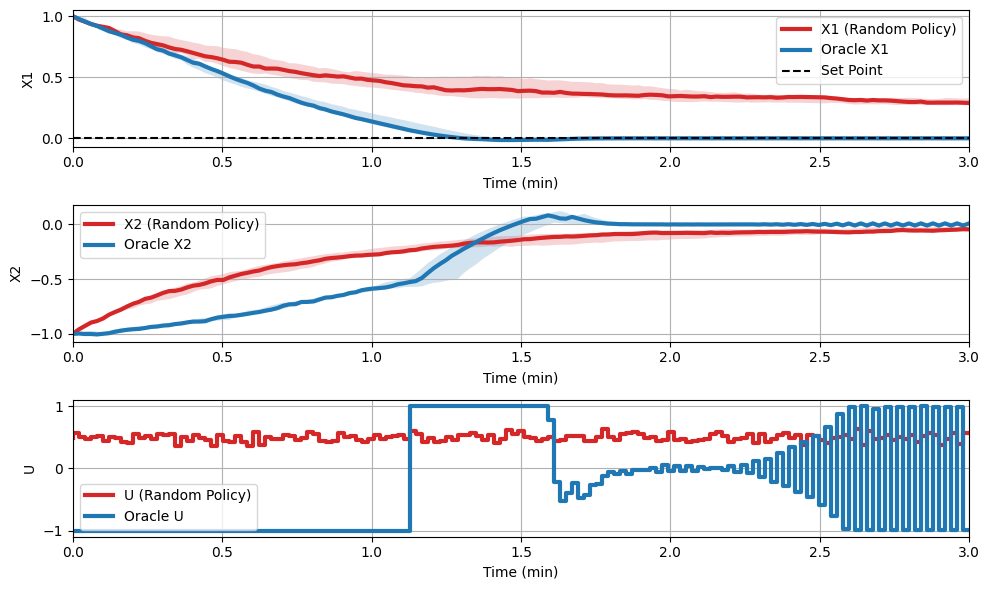

In [4]:
evaluator, data = env.plot_rollout({'Random Policy': policy}, reps=5, oracle=True, dist_reward=False, MPC_params={'N': 10, 'R': 0})

## 3. Your Implementation!
Some helpful resourses:
  - [Stable Baselines](https://stable-baselines3.readthedocs.io/en/master/) - Off the shelf implementations of common RL algorithms
 -  [Minimal RL ](https://github.com/seungeunrho/minimalRL) - Minimal versions of common RL algorithms (useful for understanding how to translate the algorithms into code)
 -  [Spinning Up in DRL](https://spinningup.openai.com/en/latest/index.html) - More implememtations from OpenAI
 - [Gymnasium](https://gymnasium.farama.org/) - The environment framework which pc-gym is built on
 - [pc-gym documentation](https://maximilianb2.github.io/pc-gym/) - The docs!

In [5]:
# Implement your RL algorithm  here! (We've Implemented a simple proportional controller to get you started)
class your_policy:
    def __init__(self) -> None:
        pass
    def predict(s,deterministic = False):
        kp = 0.75
        u = -1*kp*(s[2] - s[0]) 
        return u, s

# 4. Results

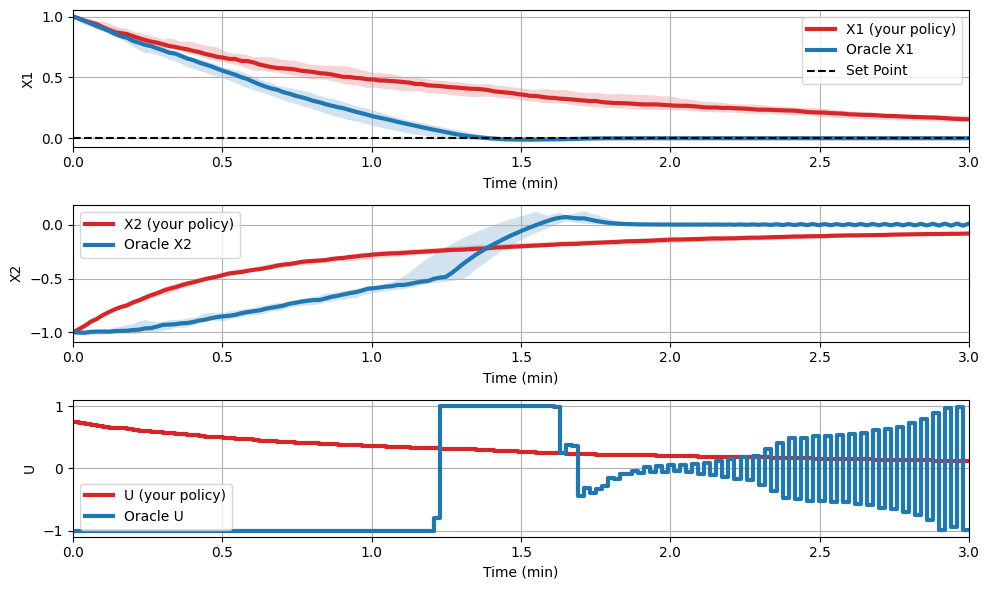

In [6]:
evaluator, data = env.plot_rollout({'your policy':your_policy}, reps = 10, oracle = True, dist_reward=False, MPC_params={'N':10,'R':0})

### Your score

In [7]:
res = data['your policy']['r'].mean()
print(f"Your final score is: {res:.2f} (larger the better).")

Your final score is: -3456.64 (larger the better).
